In [81]:
import pandas as pd
import cv2
import numpy as np
from numpy import asarray
from matplotlib import image
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import tensorflow as tf
from skimage.filters import median
from skimage.morphology import disk

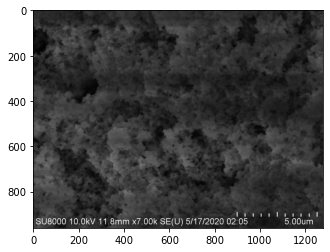

In [38]:
img = imread('./TEM/SC/498.tif')
plt.imshow(img)

In [41]:
# Convert the image to grayscale
#gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gr = img
    # Make a copy of the grayscale image
bg = gr.copy()

    # Apply morphological transformations
for i in range(5):
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                            (2 * i + 1, 2 * i + 1))
    bg = cv2.morphologyEx(bg, cv2.MORPH_CLOSE, kernel2)
    bg = cv2.morphologyEx(bg, cv2.MORPH_OPEN, kernel2)

    # Subtract the grayscale image from its processed copy
dif = cv2.subtract(bg, gr)

    # Apply thresholding
bw = cv2.threshold(dif, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
dark = cv2.threshold(bg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Extract pixels in the dark region
darkpix = gr[np.where(dark > 0)]

    # Threshold the dark region to get the darker pixels inside it
darkpix = cv2.threshold(darkpix, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Paste the extracted darker pixels in the watermark region
bw[np.where(dark > 0)] = darkpix.T
cv2.imwrite('final.jpg', bw)


#back_rm('watermark.jpg')

True

In [43]:
img2 = cv2.imread('./TEM/SC/498.tif')

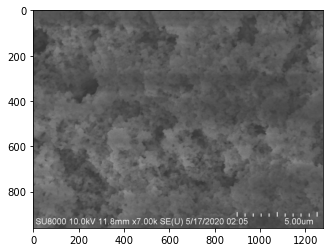

In [51]:
plt.imshow(img2)

In [52]:
img2.shape

(960, 1280, 3)

In [55]:
mask = np.zeros((img2.shape[0], img2.shape[1], img2.shape[2]))

In [56]:
mask

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [155]:
#Use PIL Pillow to load the image
import PIL

In [156]:
image = Image.open('./TEM/SC/498.tif')

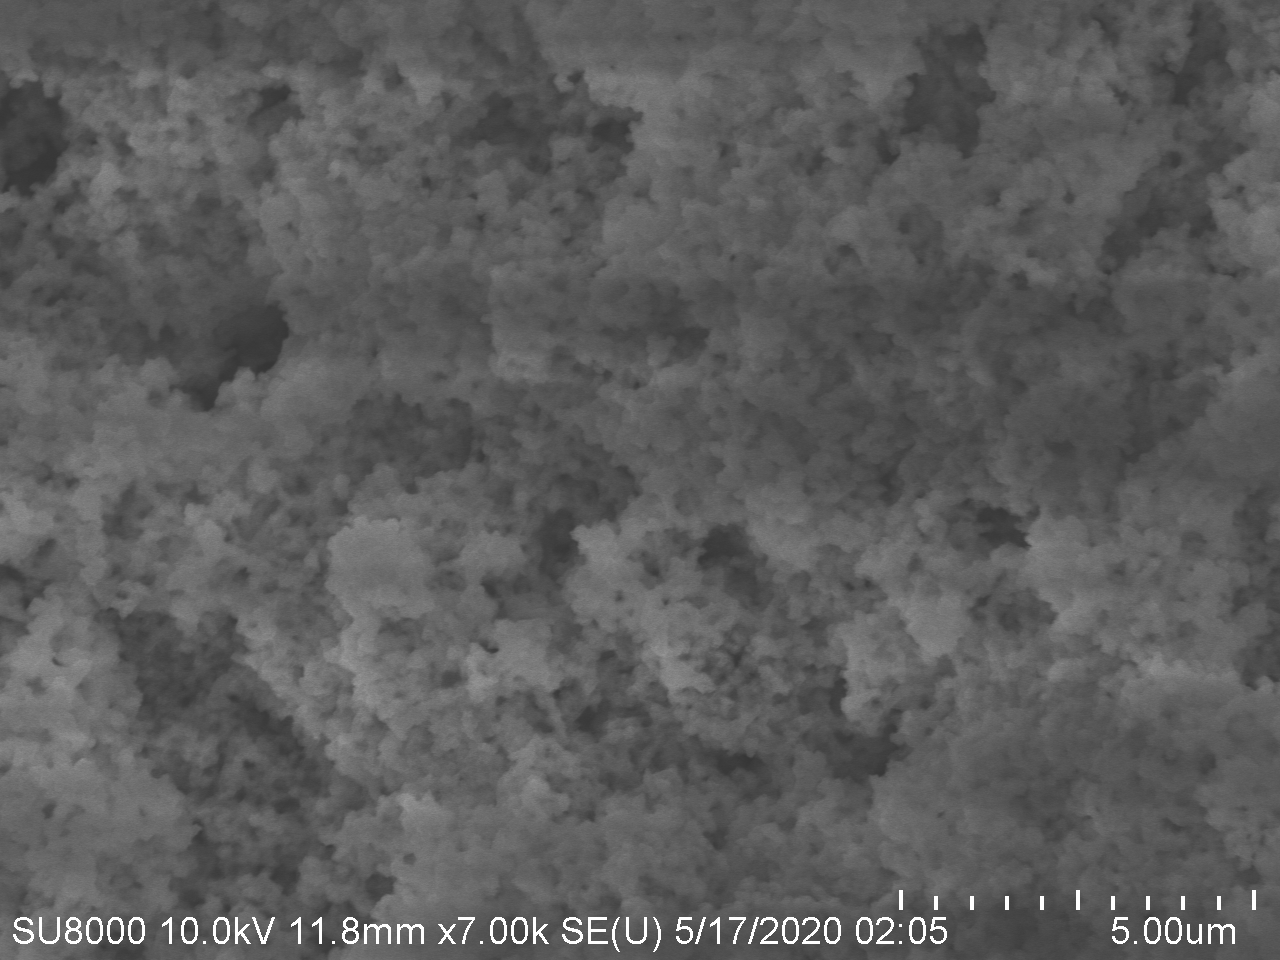

In [90]:
image

In [91]:
#Check the image type loaded from Pillow
print('format', image.format)
print('size', image.size)
print('image mode', image.mode)

format TIFF
size (1280, 960)
image mode L


In [92]:
#use numpy to convert into nparray
image_nparray = asarray(image)

In [93]:
image_nparray

array([[ 90,  90,  92, ...,  82,  85,  83],
       [ 89,  90,  92, ...,  80,  83,  85],
       [ 89,  90,  92, ...,  82,  84,  84],
       ...,
       [113, 111, 114, ...,  85,  85,  86],
       [106, 111, 114, ...,  82,  83,  85],
       [103, 109, 113, ...,  86,  84,  84]], dtype=uint8)

In [125]:
df = pd.DataFrame(image_nparray)

In [132]:
df.shape

(960, 1280)

In [1]:
a = (300, 400)

In [2]:
a[0]

300

In [149]:
df.iloc[300:315, 0:1280] = df.iloc[300:315, 0:1280]+4

In [152]:
array_edited = Image.fromarray(df.values)

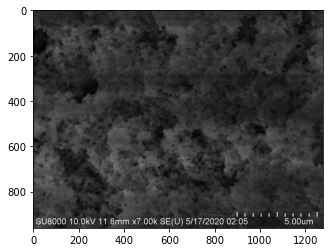

In [154]:
plt.imshow(array_edited)

In [145]:
df_1 = df.iloc[300:315, 0:1280]+4

In [146]:
df_1

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
300,89,88,91,92,92,92,92,92,92,92,...,91,92,92,93,92,92,95,95,96,98
301,88,91,90,91,93,93,93,93,91,93,...,91,92,95,91,91,92,93,95,97,95
302,91,92,93,96,96,94,95,94,94,95,...,95,95,92,91,93,93,94,94,94,95
303,89,89,91,91,93,93,94,92,95,92,...,93,91,90,91,92,93,96,97,99,99
304,86,87,90,93,95,92,93,96,95,94,...,92,92,92,91,91,93,93,96,99,98
305,87,90,91,92,93,94,92,92,94,95,...,93,91,91,91,89,90,91,91,95,97
306,85,86,90,90,89,90,93,93,93,93,...,91,92,93,92,95,96,94,93,92,92
307,87,87,86,87,87,88,91,92,96,96,...,93,89,91,94,94,96,96,97,99,96
308,85,82,82,84,85,87,88,90,95,93,...,92,92,92,93,94,96,93,93,94,97
309,84,84,84,82,83,84,84,87,91,92,...,92,91,91,94,95,96,98,98,97,95


In [148]:
df_1.values

array([[ 89,  88,  91, ...,  95,  96,  98],
       [ 88,  91,  90, ...,  95,  97,  95],
       [ 91,  92,  93, ...,  94,  94,  95],
       ...,
       [ 89,  87,  85, ...,  94,  93,  96],
       [ 92,  91,  89, ..., 100,  99,  95],
       [ 90,  88,  87, ...,  95,  96,  96]], dtype=uint8)

In [74]:
#use matplotlib import image
#load the image as pixel array!!!
image1 = image.imread('./TEM/SC/498.tif')

In [73]:
print('image dtype:', image1.dtype)
print('image shape:', image1.shape)

image dtype: uint8
image shape: (960, 1280)


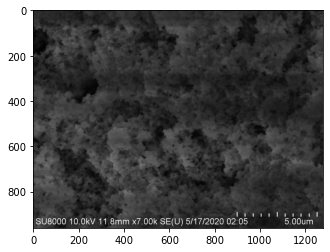

In [76]:
plt.imshow(image1)

In [94]:
image1.shape

(960, 1280)

In [122]:
image2 = cv2.imread('./TEM/SC/498.tif', 0)
start_point = (0, 300)
end_point = (1280, 315)
color = (0,0,0)
thickness = -1
image3 = cv2.rectangle(image2, start_point, end_point, color, thickness)
cv2.imshow('repair_image', image3)

In [123]:
image3

array([[ 90,  90,  92, ...,  82,  85,  83],
       [ 89,  90,  92, ...,  80,  83,  85],
       [ 89,  90,  92, ...,  82,  84,  84],
       ...,
       [113, 111, 114, ...,  85,  85,  86],
       [106, 111, 114, ...,  82,  83,  85],
       [103, 109, 113, ...,  86,  84,  84]], dtype=uint8)

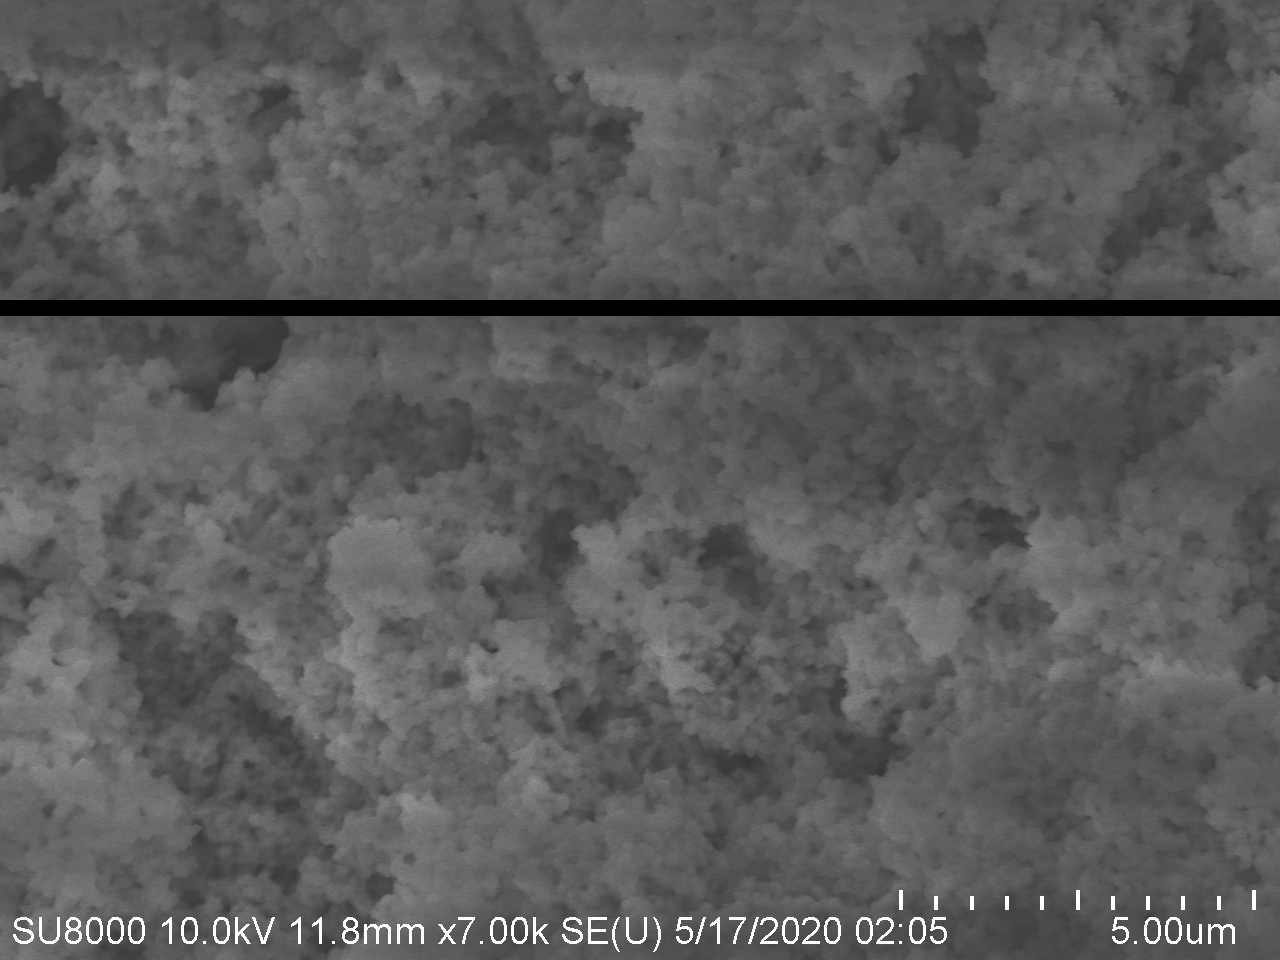

In [124]:
Image.fromarray(image3)